# **Linear Regression**

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the Data from .csv file
data = pd.read_csv('dm_suicide_data.csv')
data.head()

,state,year,cause,male,female
0,GUJARAT,2001,House Wife,0,1568
1,GUJARAT,2001,Service (Government),62,8
2,GUJARAT,2001,Service (Private),365,39
3,GUJARAT,2001,Public Sector Undertaking,92,15
4,GUJARAT,2001,Student,134,130


In [ ]:
data['total'] = round((data['male'] + data['female']), 2)

**FOR FEMALE**

In [ ]:
# Collecting x & y
X = data['female'].values
Y = data['total'].values

# Calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [ ]:
# Total no.of input values
m = len(X)

# Using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.8278104099817065 
c = 280.93107170859196


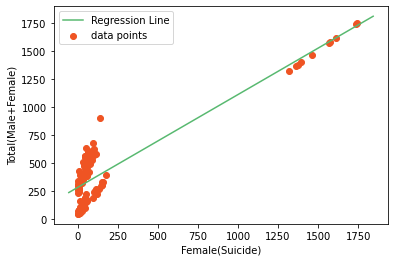

In [ ]:
# Plotting values and Regression line
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# Calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('Female(Suicide)')
plt.ylabel('Total(Male+Female)')
plt.legend()
plt.show()

In [ ]:
# Calculating R-squared value for measuring goodness of our model.
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

val_count = 72

for i in range(int(val_count)): # val_count represents the no.of input x values
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.8590906519111214


**MALE**

In [ ]:
# Collecting z & y
Z = data['male'].values
Y = data['total'].values

# Calculate mean of x & y using an inbuilt numpy method mean()
mean_z = np.mean(Z)
mean_y = np.mean(Y)

In [ ]:
# Total no.of input values
m = len(Z)

# Using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (Z[i] - mean_z) * (Y[i] - mean_y)
  denom += (Z[i] - mean_z) ** 2
m = numer / denom
c = mean_y - (m * mean_z)

print (f'm = {m} \nc = {c}')

m = 0.15890329037827386 
c = 384.3943779898421


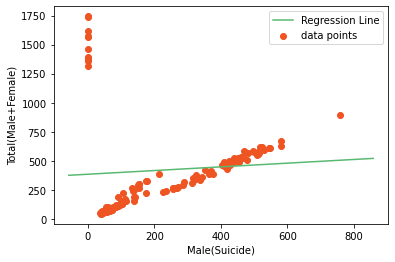

In [ ]:
# Plotting values and Regression line
max_z = np.max(Z) + 100
min_z = np.min(Y) - 100

# calculating line values x and y
z = np.linspace (min_z, max_z, 100)
y = c + m * z

plt.plot(z, y, color='#58b970', label='Regression Line')
plt.scatter(Z, Y, c='#ef5423', label='data points')

plt.xlabel('Male(Suicide)')
plt.ylabel('Total(Male+Female)')
plt.legend()
plt.show()

In [ ]:
# Calculating R-squared value for measuring goodness of our model.
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

val_count = 45
for i in range(int(val_count)): # val_count represents the no.of input x values
  y_pred = c + m * Z[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

[-0.0066558]


In [ ]:
# Linear regression implementation using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Z = Z.reshape(-1, 1)
reg = LinearRegression()
reg = reg.fit(Z,Y)

Y_pred = reg.predict(Z)
r2_square = reg.score(Z, Y)

print (r2_square)

0.006008361383683547


# **Graph**

**Graph - Total number of suicides from 2001 to 2012:**

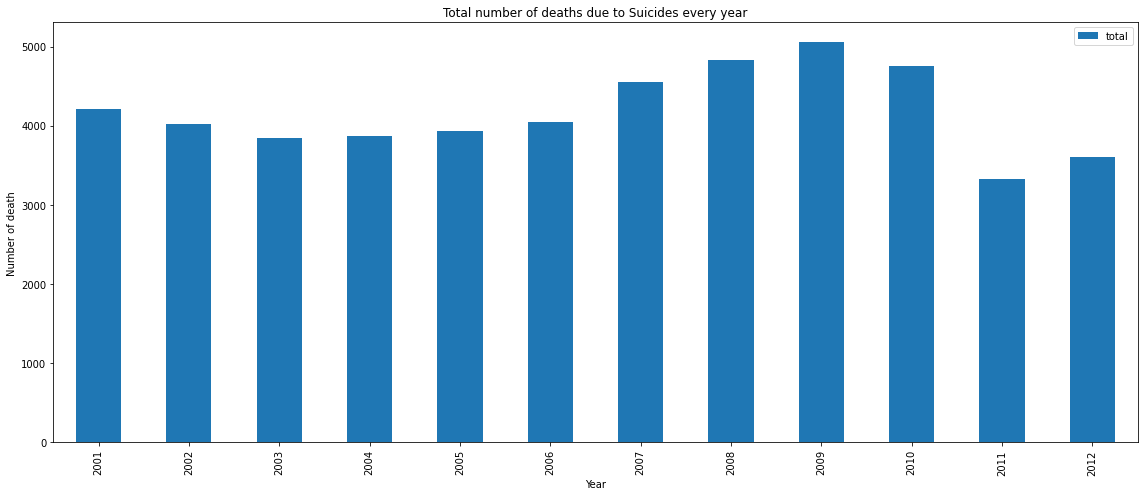

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dm_suicide_data.csv')
data.head()
data['total'] = round((data['male'] + data['female']), 2)
data.head(100)
df = pd.DataFrame(data).groupby(by='year').sum()
df.pop("male")
df.pop("female")
df.plot(kind='bar', title='Total number of deaths due to Suicides every year', ylabel='Number of death',xlabel='Year', figsize=(16, 7))

plt.tight_layout()
plt.show()

**Graph - Number of suicides in Male and Female:**

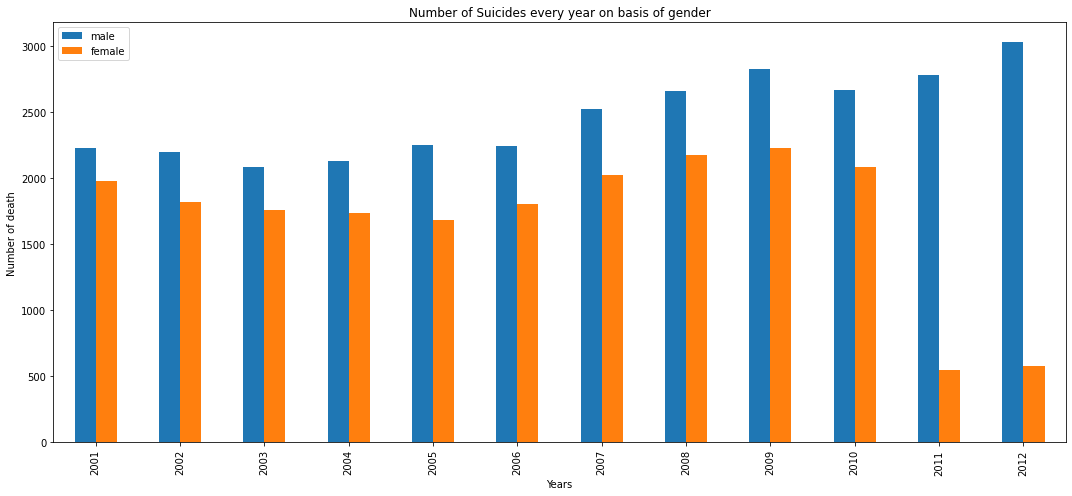

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dm_suicide_data.csv')
data.head()
data['total'] = round((data['male'] + data['female']), 2)
data.head(100)
df = pd.DataFrame(data).groupby(by='year').sum()
df.pop('total')
df.plot(kind='bar', title='Number of Suicides every year on basis of gender', ylabel='Number of death',xlabel='Years', figsize=(15, 7))

plt.tight_layout()
plt.show()

**Graph - Total number of deaths due to suicide based on Causes:**

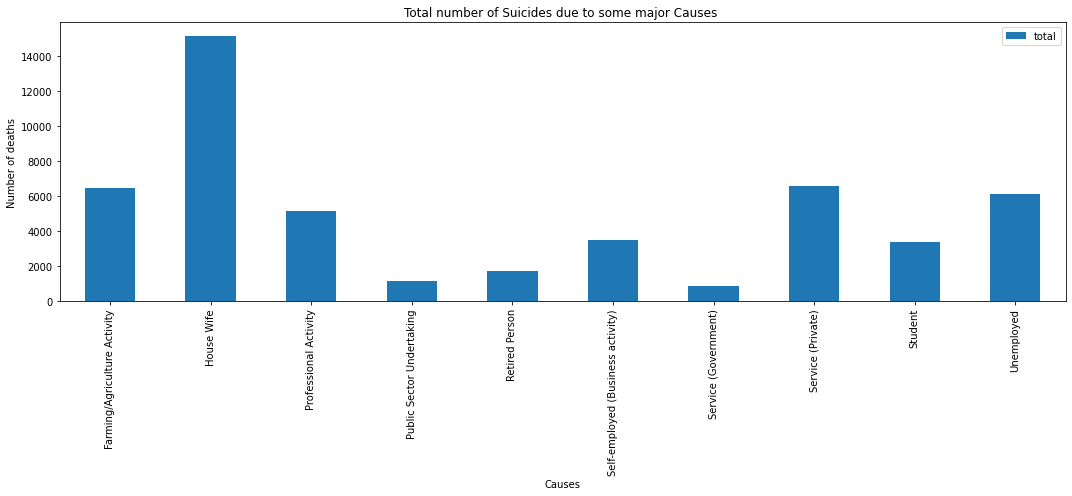

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dm_suicide_data.csv')
data.head()
data['total'] = round((data['male'] + data['female']), 2)
data.head(100)
df = pd.DataFrame(data).groupby(by='cause').sum()
df.pop("year")
df.pop("male")
df.pop("female")
df.plot(kind='bar', title='Total number of Suicides due to some major Causes ', ylabel='Number of deaths',xlabel='Causes', figsize=(15, 7))

plt.tight_layout()
plt.show()

**Graph - Total number of suicides along with number of Male & Female suicides:**

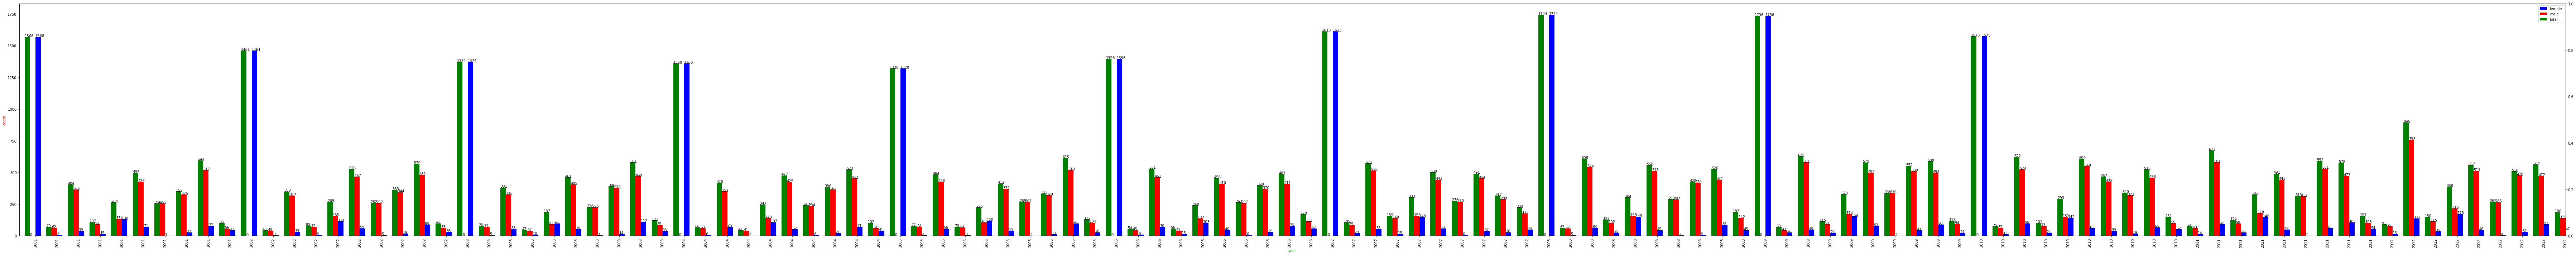

In [ ]:
df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize = (100, 10))
ax2=ax.twinx()
width = 0.25

df.plot(x='year',y='female',kind='bar', color='blue', ax=ax, width=width, position=0)
df.plot(x='year',y='male',kind='bar', color='red', ax=ax, width=width, position=1)
df.plot(x='year',y='total',kind='bar', color='green', ax=ax, width=width, position=2)

for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

ax.set_xlabel('year', color = 'g')
ax.set_ylabel('death', color = 'r')

plt.tight_layout()
plt.show()